In [1]:
from mpl_toolkits.mplot3d import axes3d
import networkx as nx
import matplotlib.pyplot as plt

def make_adj_dict(f_adjlist):
    
    adj_dict={}
    
    with open(f_adjlist, 'r') as f:
        temp = f.readlines()

    content = [x.strip() for x in temp] 
    for row in content:
        row_t = row.split()
        #print(row.split())
        adj_dict[row_t[0]]=row_t[1:]
    
    #print(adj_dict)
    return adj_dict
def plot3d(edgelist, embedding, title='', node_color='blue', edge_color='black',linewidth=0.3):
    
    
    adj = make_adj_dict(edgelist)
    
    #data = embedding
    # read embedding and make embedding dict
    data = {}

    with open(embedding, 'r') as f:
        temp = f.readlines()

    content = [x.strip() for x in temp] 
    for row in content[1:]:
        row_t = row.split()
        data[row_t[0]]=(float(row_t[1]),float(row_t[2]),float(row_t[3]))
    
    #print(data)
    nodes = data.keys()
    nodes = sorted(nodes, key=lambda n : int(n))
    
    fig = plt.figure(0)
    ax = fig.add_subplot(111, projection='3d')
    
    # Plotting nodes from the embedding given their coordinates
    ax.scatter(
        [data[key][0] for key in nodes], 
        [data[key][1] for key in nodes], 
        [data[key][2] for key in nodes], 
        c=node_color
    )
    # Plotting labels
    for key in nodes:
        ax.text(data[key][0]+0.03,data[key][1],data[key][2],key,fontsize=9)
    
    # Plotting edges between adjacent nodes
    for node in adj:
        neighbors = adj[node]
        
        X, Y, Z = [data[node][0]], [data[node][1]], [data[node][2]]
        
        for neighbor in neighbors:
            X.append(data[neighbor][0])
            X.append(data[node][0])
            
            Y.append(data[neighbor][1])
            Y.append(data[node][1])
            
            Z.append(data[neighbor][2])
            Z.append(data[node][2])
        
        ax.plot(X, Y, Z, color=edge_color,linewidth=linewidth)
        
    
    plt.title(title)


In [13]:

embedding_f= 'C:/Users/Hp/Downloads/deepwalk/graph30in_5out_8d.embeddings'


data = {}
with open(embedding_f, 'r') as f:
    temp = f.readlines()

content = [x.strip() for x in temp] 
for row in content[1:]:
    row_t = row.split()
    data[row_t[0]]=[row_t[i] for i in range(1,len(row_t))]

#print(data)

data_array = []

for key in data:
    data_row=[key]
    for n in data[key]:
        data_row.append(float(n))
    data_array.append(data_row)
#print(data_array)

#np_array = np.asarray(a)

In [15]:
import numpy as np

np_array = np.asarray(data_array)
np_array = np.delete(np_array, 0, 1)
#print(np_array)

In [25]:
from sklearn.manifold import TSNE

embedding_3d = TSNE(n_components=3).fit_transform(np_array)


print(embedding_3d)

[[ 1.18589096e+01  1.28700195e+02 -5.17075195e+01]
 [-9.67624817e+01 -2.12373409e+01  1.07754494e+02]
 [-1.17145370e+02  5.74932480e+00 -1.00107903e+02]
 [-3.95838318e+01 -1.92011475e+02 -1.93854541e-01]
 [ 3.11544552e+01  4.40858269e+00 -5.05673004e+02]
 [ 3.55560493e+01 -1.23107117e+02  1.85291199e+02]
 [ 2.12157841e+01 -8.52386570e+00  2.35999039e+02]
 [ 5.50735512e+01 -2.42944264e+00  3.34402962e+01]
 [-2.40299263e+01  2.31739311e+01  8.58879089e+01]
 [ 9.59978485e+01  9.73518066e+01  1.38325958e+01]
 [-1.40430328e+02 -1.61894669e+02  3.94992560e-01]
 [-1.64892624e+02 -6.88431854e+01 -3.46760902e+01]
 [-3.99694366e+01  3.28271255e+01 -2.13610397e+02]
 [ 4.62923851e+01  2.50467205e+01 -1.50553497e+02]
 [-3.12453594e+01 -1.06944237e+02 -5.87610168e+01]
 [ 7.04001389e+01  1.76733444e+02  1.72227081e+02]
 [-7.84206390e+01  1.40411453e+02 -1.39984879e+02]
 [-4.46557098e+02  8.29016479e+02  1.57303238e+02]
 [-1.56796356e+02  2.70142198e+00  4.04392700e+01]
 [-1.52258926e+02  1.05938559e+

In [38]:
embedding_dict_3d={}



for i in range(len(data_array)):
    embedding_dict_3d[data_array[i][0]] = list(embedding_3d[i]) 

print(embedding_dict_3d)


{'24': [11.85891, 128.7002, -51.70752], '36': [-96.76248, -21.23734, 107.75449], '64': [-117.14537, 5.749325, -100.1079], '3': [-39.58383, -192.01147, -0.19385454], '20': [31.154455, 4.4085827, -505.673], '5': [35.55605, -123.10712, 185.2912], '34': [21.215784, -8.523866, 235.99904], '21': [55.07355, -2.4294426, 33.440296], '43': [-24.029926, 23.173931, 85.88791], '44': [95.99785, 97.35181, 13.832596], '77': [-140.43033, -161.89467, 0.39499256], '32': [-164.89262, -68.843185, -34.67609], '16': [-39.969437, 32.827126, -213.6104], '8': [46.292385, 25.04672, -150.5535], '10': [-31.24536, -106.94424, -58.761017], '37': [70.40014, 176.73344, 172.22708], '63': [-78.42064, 140.41145, -139.98488], '72': [-446.5571, 829.0165, 157.30324], '35': [-156.79636, 2.701422, 40.43927], '65': [-152.25893, 10.593856, -186.12758], '6': [-162.64565, 201.3206, 907.5324], '74': [-140.58159, -120.081985, 84.42815], '4': [-676.4512, 640.3278, 526.48413], '23': [43.372288, 47.351696, -44.60417], '38': [177.72801

<IPython.core.display.Javascript object>


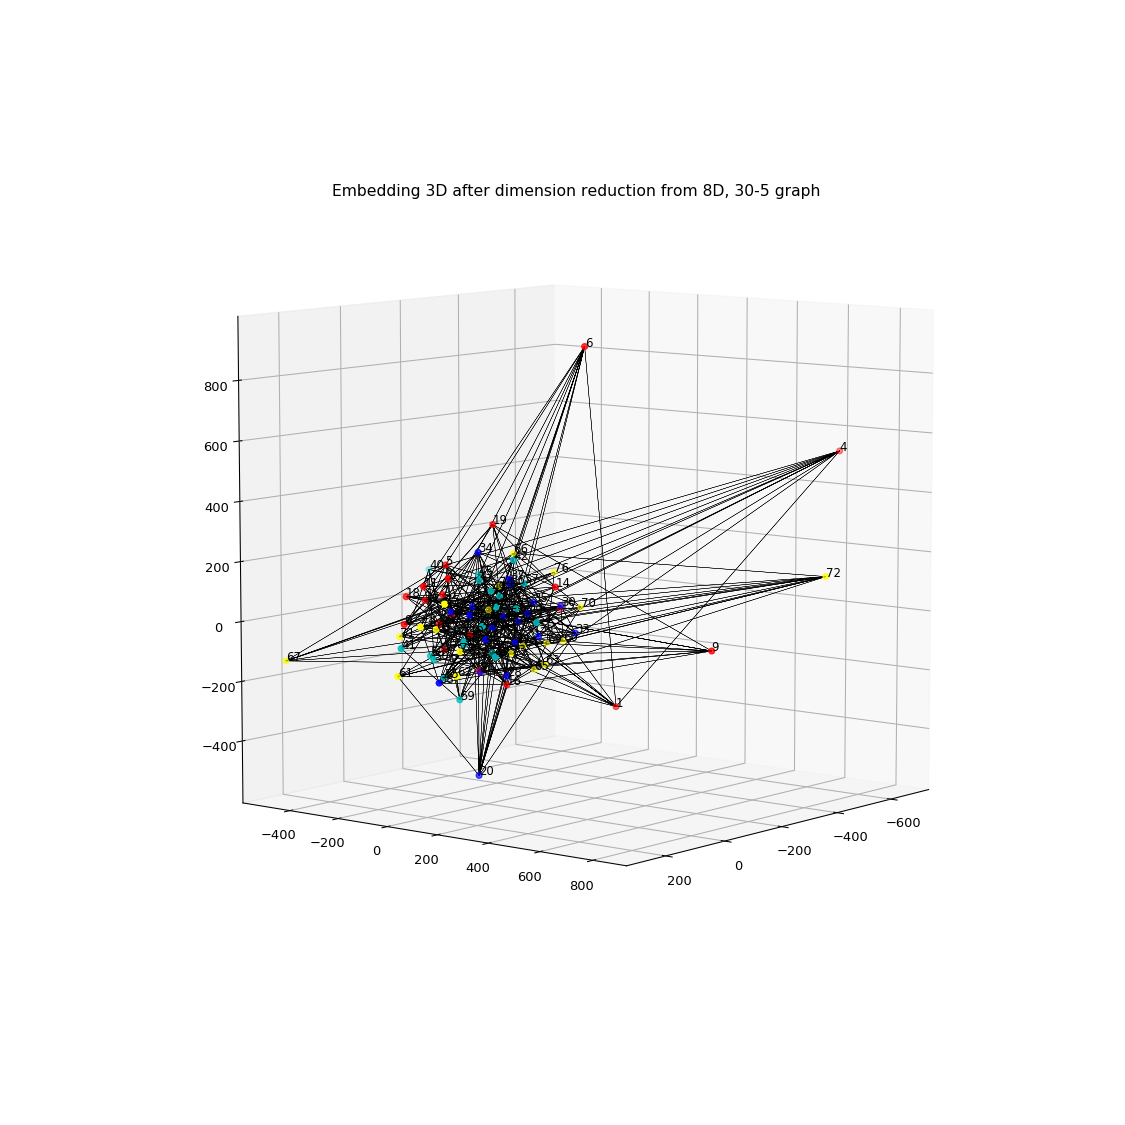

In [39]:
def plot3d(edgelist, embedding, title='', node_color='blue', edge_color='black',linewidth=0.3):
    
    
    adj = make_adj_dict(edgelist)
    
    data = embedding
    
    #print(data)
    nodes = data.keys()
    nodes = sorted(nodes, key=lambda n : int(n))
    
    fig = plt.figure(0)
    ax = fig.add_subplot(111, projection='3d')
    
    # Plotting nodes from the embedding given their coordinates
    ax.scatter(
        [data[key][0] for key in nodes], 
        [data[key][1] for key in nodes], 
        [data[key][2] for key in nodes], 
        c=node_color
    )
    # Plotting labels
    for key in nodes:
        ax.text(data[key][0]+0.03,data[key][1],data[key][2],key,fontsize=9)
    
    # Plotting edges between adjacent nodes
    for node in adj:
        neighbors = adj[node]
        
        X, Y, Z = [data[node][0]], [data[node][1]], [data[node][2]]
        
        for neighbor in neighbors:
            X.append(data[neighbor][0])
            X.append(data[node][0])
            
            Y.append(data[neighbor][1])
            Y.append(data[node][1])
            
            Z.append(data[neighbor][2])
            Z.append(data[node][2])
        
        ax.plot(X, Y, Z, color=edge_color,linewidth=linewidth)
        
    
    plt.title(title)

color_map=[]
colors = ['r','b','c','yellow']
for node in range(80):
    if node<20:
        color_map.append(colors[0])
    elif 20<=node<40:
        color_map.append(colors[1])
    elif 40<=node<60:
        color_map.append(colors[2])
    else:
        color_map.append(colors[3])

graph_f = 'C:/Users/Hp/Downloads/deepwalk/example_graphs/graph30in_5out.adjlist'
%matplotlib notebook
plt.rcParams["figure.figsize"] = (12,12)
plot3d(edgelist=graph_f, embedding=embedding_dict_3d ,node_color = color_map, title='Embedding 3D after dimension reduction from 8D, 30-5 graph')